#### 통계적 추정
- 점추정
  - 모평균이나 모분산 등의 모수를 하나의 수치로 추정
  - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
  - 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
  - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함
  - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
  - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
  - 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.
  
- 구간추정
  - 모분산을 알고 있는 경우의 모평균 구간추정
  - 모분산을 알고 있는 경우의 모분산 구간추정
  - 모분산을 알지 못하는 경우의 모평균 구간추정
  - 베르누이 분포의 모평균의 구간추정
  - 포아송 분포의 모평균의 구간추정

In [3]:
# [과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요.

,score
0,76
1,55
2,80
3,80
4,74


모평균, 모분산: 69.53 206.6691


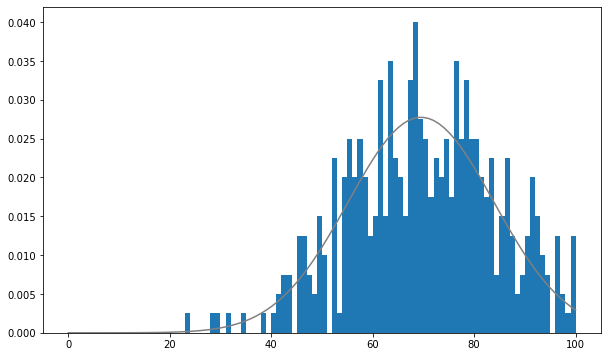

모평균: 69.53 
 표본평균의 기댓값: 69.53799999999998


69.542954

In [4]:
# 시험점수 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
display(df.head())

# 모평균과 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)
print('모평균, 모분산:', p_mean, p_var)

# 시험점수 모집단(전교생 시험점수)이 정규분포를 따른다고 가정 
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color='gray')
plt.hist(scores, bins=100, range=(0,100), density=True) # 전체 시험점수 히스토그램
plt.show()

n = 20
# 표본 크기가 20인 표본 데이터 1만 개 추출
# (표본으로 평균과 분산을 어느 저옫의 정확도로 추출할 수 있는지 시뮬레이션)
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 대수의 법칙을 사용하여 기댓값이 모평균인 것을 확인
sample_means = np.mean(samples, axis=1) # 준비해둔 1만 개의 표본 데이터(n=20) 각각의 표본평균을 구하고
s_means = np.mean(sample_means)         # 그 표본평균들의 평균(기댓값) 계산
print('모평균:', p_mean, '\n', 
      '표본평균의 기댓값:', s_means)
## 표본크기 n을 백만까지 키웠을 때의 표본평균
np.mean(np.random.choice(scores, int(1e6)))


In [5]:
## 표본분산이 모분산의 불편추정량이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1) # 준비해둔 1만 개의 표본 데이터 각각의 표본분산 구하고
s_vars = np.mean(sample_vars)         # 표본분산의 평균 
## 불편분산이 모분산의 불편추정량이 되는지 확인
sample_u_vars = np.var(samples, axis=1, ddof=1)
u_vars = np.mean(sample_u_vars)
print('모분산:', p_var, '\n', 
      '표본분산:', s_vars, '\n', 
     '불편분산:', u_vars)


모분산: 206.6691 
 표본분산: 196.34417850000003 
 불편분산: 206.67808263157895


In [6]:
# [과제] 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬 코드로 수행하세요.

모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$


In [9]:
s_mean = np.mean(samples)
u_var = np.var(samples, ddof=1)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)
lcl,ucl

(62.807636981878474, 76.26836301812152)

In [10]:
# [과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 95% 수준의 모평균 신뢰구간을 구하세요

In [11]:
# 1시간당 액세스 수
n_access_df = pd.read_csv('data/ch10_access.csv')
print(len(n_access_df),'\n', n_access_df.head(),'\n')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

s_mean = n_access.mean()
s_mean

rv = stats.norm
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl


72 
    access number
0             10
1             11
2              9
3              9
4             18 



(9.697953549598202, 11.190935339290688)

#### 통계적 가설검정

In [12]:
# [과제] A학생의 사례로 가설검정의 프로세스를 정리하세요.

In [13]:
# 귀무가설 : 감자튀김의 평균무게는 130g이다.
# 대립가설 : 감자튀김의 평균무게는 130g보다 작다.
# 유의 수준은 5%로 설정
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df.무게)
s_mean = sample.mean()
# 표본평균 : A가 산 감자튀김 14개의 평균 무게 = 128.451g
rv = stats.norm(130, np.sqrt(9/14))
print(rv.isf(0.95),'\n')
# 임계값 : 128.681g
# 검정통계량이 임계값보다 작기때문에 귀무가설은 기각된다.

# 표준화 하여 검정통계량과 임계값의 비교
# 표준화 된 검정 통계량 값, -1.932
z = (s_mean-130)/np.sqrt(9/14)
print(z,'\n')
# 임계값 : 퍼센트 포인트, -1.645 
rv = stats.norm()
print(rv.isf(0.95) , '\n')
# 검정통계량이 임계값보다 작으므로 귀무가설은 기각

# p값을 활용하여 가설검정
print(rv.cdf(z))
# 유의수준인 0.05보다 작으므로 귀무가설 기각
# 따라서 모평균은 130g보다 작다.

128.68118313069039 

-1.932298779026813 

-1.6448536269514722 

0.026661319523126635


Text(0, 0.5, 'cdf')

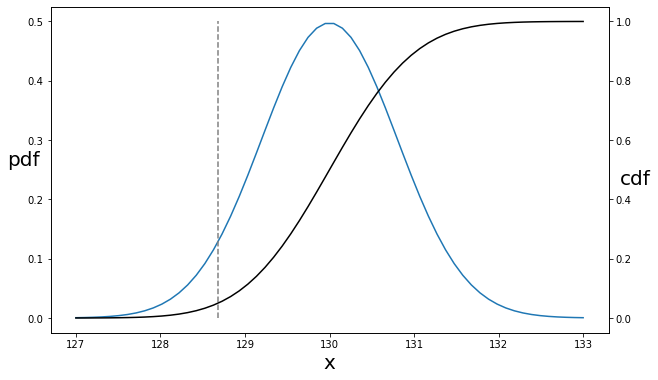

In [17]:
import numpy as np
import matplotlib.pyplot as plt
rv = stats.norm(130,np.sqrt(9/14))
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs), color='black')
ax1.vlines(rv.ppf(0.05), 0, 0.5, color='gray',ls='--')
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf', rotation=0,fontsize=20)


Q. "감자튀김 무게의 평균이 130g이다" 라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 분산 9)

In [15]:
# 검정통계량이 임곗값보다 작으므로 귀무가설을 기각한다.
df = pd.read_csv('./data/ch11_potato.csv')
sample = df.무게

# 검정통계량
s_mean = np.mean(sample)
z = (s_mean - 130) / np.sqrt(9/14)
print(z,'\n')

# 임곗값
rv = stats.norm()
rv.isf(0.95)

-1.932298779026813 



-1.6448536269514722

In [16]:
# p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 
# "모평균은 130g이다"라는 결론이 되는 것은 아니다.
p_value = rv.cdf(z)
p_value

0.026661319523126635

In [18]:
# 양측검정
z = (s_mean-130) / np.sqrt(9/14)
z

-1.932298779026813

In [19]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [20]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값이 0.05 보다 크므로 귀무가설은 기각되지 않는다. '감자튀김 무게는 130g이 아니다'라고 말할 수 없다.
rv.cdf(z) * 2

0.05332263904625327

#### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - 실제로 평균이 130g인데도 '모평균은 130g 보다 작다'라는 결론을 내리는 상황
- 제 2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - 모평균은 130g 보다 작다인데도 '모평균은 130g 보다 작다'라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있짐나 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

In [34]:
# 제 1종 오류를 범할 비율 : 위험률, 유의수준(𝛼), 분석가가 제어할 수 있는 확률
np.random.seed(10)
rv = stats.norm(130,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.0522

In [ ]:
# 제 2종 오류를 범하는 비율 : 1-𝛽, 검정력, 분석가가 제어할 수 없는 확률
# [과제] 감자튀김 사례로 2종 오류를 범하는 비율을 구하세요.(감자튀김 평균이 128g으로 설정되어 있는 것을 알고 있다고 가정)

In [3]:
import numpy as np
from scipy import stats
np.random.seed(10)
rv=stats.norm(128,3)
c=stats.norm().isf(0.95)
n_sample=10000
cnt=0
for _ in range(n_sample):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_sample


0.1932

정규분포의 모평균에 대한 검정(모분산을 알고 있음)

In [ ]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정으로 수행하세요

In [7]:
import pandas as pd
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])

def pmean_test(sample,mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean-mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1-rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')
pmean_test(sample,130,9)

귀무가설을 채택
p값은 0.053


In [36]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0 # 검정 통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [37]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


정규분포의 모평균에 대한 검정(모분산을 알지 못함)

In [39]:
def pmean_test(sample,mean0,alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1-rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

pmean_test(sample, 130)   

귀무가설을 채택
p값은 0.169


[과제] 대응표본, 독립표본에 대하여 정규분포를 가정하는 경우와 가정할 수 없는 경우의 4가지 유형의 각 사례를 작성하세요.

In [ ]:
# 정규분포를 가정
# 대응표본 t검정 - ex) 같은 시간에 수영을 하는 아침반 사람들이 수영을 한달 한 뒤 체중의 변화가 있는지를 검정?
# 독립표본 t검정 - ex) 아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 수영을 한달 한 뒤 두반의 체중의 변화가 있는지를 검정?
# 정규분포를 가정할 수 없는 경우
# 대응표본 - 윌콕슨의 부호순위검정
# 독립표본 - 만 위트니의 U검정

In [43]:
# 대응표본 t검정
data = pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후'] - data['전']
print(data.shape, '\n', data.head())

(20, 3) 
     전   후  gap
0  59  41  -18
1  52  63   11
2  55  68   13
3  61  59   -2
4  59  84   25


In [44]:
#  p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각하며 '근력운동은 집중력에 유의한 차이를 가져온다'라고 할 수 있다. 
t, p = stats.ttest_1samp(data.gap, 0)
p

0.04004419061842953

In [45]:
# 독립표본 t검정
data = pd.read_csv('./data/ch11_training_ind.csv')
print(data.head())

    A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51


In [46]:
# p값이 0.05 보다 크므로 귀무가설을 채택하며 'A 학생의 학급과 B 학생의 학급사이에는 평균 점수에 유의한 차이가 있다고 말할 수 없다.'
t,p = stats.ttest_ind(data.A, data.B, equal_var=False)
p

0.08695731107259361

In [ ]:
# [과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()

In [12]:
# [과제] 정규분포를 가정할 수 없는 경우 독립표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_ind.csv')
data2 = data[:5].copy()
data2

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [13]:
training_ind = pd.read_csv('./data/ch11_training_ind.csv')
u,p = stats.mannwhitneyu(data2['A'],data2['B'],alternative='two-sided')
p


0.30952380952380953

[과제] 독립성 검정이 필요한 사례 2가지를 작성하세요.

In [48]:
df = pd.read_csv('./data/ch11_ad.csv')
print(len(df),'\n')
df.head()

1000 



,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [50]:
# 교차집계표
ad_cross = pd.crosstab(df.광고, df.구입)
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [52]:
# p값이 0.05보다 크므로 귀무가설을 채택하며 '광고 A와 광고 b에 유의미한 차이가 인정되지 않는다'고 결론 내릴 수 있다
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2,p,dof

(3.75, 0.052807511416113395, 1)

In [ ]:
# [과제] 기대도수와 관측도수(실측)의 차이를 측정해서 검정 수행